# Seepark GPS Reference Point

Date: 23.11.2022

Time: 12:30:15 - 12:46:18 GMT+1

Duration: 0:16:03

Movement: Static

GPS update period: 1.0 s

## Load CSV File

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

filename = "tableview_221210_010201_full.csv"  # update csv filename here

#frequency = 4   # update data update rate
frequency = 1

# Reference point information
ref_lat = 48.012317
ref_lon = 7.813296
ref_err_lat = 110  # error in cm
ref_err_lon = 80

df = pd.read_csv(filename)

# Convert UTC column to datetime
df["UTC"] = pd.to_datetime(df["UTC"])

## Additional Data

In [2]:
df["DGPS"] = df["DGPS"].eq("Yes").astype(int)
df["dT"] = df["UTC"].diff() / np.timedelta64(1, "s")
df["Alt (HAE) Rate of Change"] = df["Alt (HAE)"].diff() * df["dT"]
df["X Diff"] = df["X"].diff()
df["Y Diff"] = df["Y"].diff()
df["Z Diff"] = df["Z"].diff()
df["Distance Change"] = np.sqrt(df["X Diff"] ** 2 + df["Y Diff"] ** 2 + df["Z Diff"] ** 2)
df["Velocity"] = df["Distance Change"] * df["dT"]
df.info()
pd.set_option('display.max_columns', None)
df.tail(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3853 entries, 0 to 3852
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Index                     3853 non-null   int64         
 1   UTC                       3853 non-null   datetime64[ns]
 2   GPS time                  3853 non-null   object        
 3   Fix type (GPS)            3793 non-null   object        
 4   DGPS                      3853 non-null   int64         
 5   Carrier Range Status      3853 non-null   int64         
 6   X                         3792 non-null   float64       
 7   Y                         3792 non-null   float64       
 8   Z                         3792 non-null   float64       
 9   Lat                       3792 non-null   float64       
 10  Lon                       3792 non-null   float64       
 11  Alt (HAE)                 3792 non-null   float64       
 12  Alt (MSL)           

Index                     UTC         GPS time Fix type (GPS)  DGPS  \
3850   3850 2022-11-23 11:46:17.500  2237:301595.500             3D     1   
3851   3851 2022-11-23 11:46:17.750  2237:301595.750             3D     1   
3852   3852 2022-11-23 11:46:18.000  2237:301596.000             3D     1   

      Carrier Range Status            X           Y            Z        Lat  \
3850                     0  4235208.848  581153.216  4718014.416  48.012343   
3851                     0  4235208.848  581153.216  4718014.416  48.012343   
3852                     0  4235208.848  581153.216  4718014.416  48.012343   

           Lon  Alt (HAE)  Alt (MSL)  VX  VY  VZ  VN  VE  VD   SoG  VACC 3D  \
3850  7.813302      295.8      248.5 NaN NaN NaN NaN NaN NaN  0.01      NaN   
3851  7.813302      295.8      248.5 NaN NaN NaN NaN NaN NaN  0.02      NaN   
3852  7.813302      295.8      248.5 NaN NaN NaN NaN NaN NaN  0.01      NaN   

      2d Err  HDOP  VDOP  PDOP  SVs Tracked  SVs Used  \
3850     NaN   0.7   1.1   1.3           45        24   
3851     NaN   0.7   1.1   1.3           45        24   
3852     NaN   0.7   1.1   1.3           45        24   

                                               Used SVs    dT  \
3850  G2 G5 G7 G9 G13 G14 G20 G30 R4 R5 R14 R15 R21 ...  0.25   
3851  G2 G5 G7 G9 G13 G14 G20 G30 R4 R5 R14 R15 R21 ...  0.25   
3852  G2 G5 G7 G9 G13 G14 G20 G30 R4 R5 R14 R15 R21 ...  0.25   

      Alt (HAE) Rate of Change  X Diff  Y Diff  Z Diff  Distance Change  \
3850                       0.0  -0.015   0.011   0.013         0.022694   
3851                       0.0   0.000   0.000   0.000         0.000000   
3852                       0.0   0.000   0.000   0.000         0.000000   

      Velocity  
3850  0.005673  
3851  0.000000  
3852  0.000000

# Basic Statistics

In [3]:
print("Number of data points:", df["Index"].count())

idx_DGPS_lockin = df["DGPS"].idxmax()

print(f"Index of first DGPS lock-in: {idx_DGPS_lockin}")

df.describe()

Number of data points: 3853
Index of first DGPS lock-in: 790


Index         DGPS  Carrier Range Status             X  \
count  3853.000000  3853.000000                3853.0  3.792000e+03   
mean   1926.000000     0.794965                   0.0  4.235208e+06   
std    1112.409622     0.403780                   0.0  8.577383e-01   
min       0.000000     0.000000                   0.0  4.235205e+06   
25%     963.000000     1.000000                   0.0  4.235207e+06   
50%    1926.000000     1.000000                   0.0  4.235208e+06   
75%    2889.000000     1.000000                   0.0  4.235208e+06   
max    3852.000000     1.000000                   0.0  4.235210e+06   

                   Y             Z          Lat          Lon    Alt (HAE)  \
count    3792.000000  3.792000e+03  3792.000000  3792.000000  3792.000000   
mean   581152.795687  4.718013e+06    48.012339     7.813299   293.704562   
std         0.343102  1.628207e+00     0.000007     0.000005     1.652638   
min    581151.315000  4.717999e+06    48.012275     7.813283   282.200000   
25%    581152.544000  4.718012e+06    48.012336     7.813295   292.800000   
50%    581152.753500  4.718012e+06    48.012341     7.813297   293.400000   
75%    581153.039500  4.718014e+06    48.012343     7.813302   294.700000   
max    581153.423000  4.718015e+06    48.012350     7.813309   296.600000   

         Alt (MSL)   VX   VY   VZ       VN        VE   VD          SoG  \
count  3792.000000  0.0  0.0  0.0  4.00000  4.000000  0.0  3792.000000   
mean    246.404562  NaN  NaN  NaN  0.08750  0.047500  NaN     0.008861   
std       1.652638  NaN  NaN  NaN  0.17519  0.179513  NaN     0.010393   
min     234.900000  NaN  NaN  NaN -0.16000 -0.120000  NaN     0.000000   
25%     245.500000  NaN  NaN  NaN  0.02750 -0.097500  NaN     0.000000   
50%     246.100000  NaN  NaN  NaN  0.14000  0.035000  NaN     0.010000   
75%     247.400000  NaN  NaN  NaN  0.20000  0.180000  NaN     0.010000   
max     249.300000  NaN  NaN  NaN  0.23000  0.240000  NaN     0.330000   

       VACC 3D  2d Err         HDOP         VDOP         PDOP  SVs Tracked  \
count      0.0     0.0  3853.000000  3853.000000  3853.000000  3853.000000   
mean       NaN     NaN     2.265507     2.548689     2.765274    35.817285   
std        NaN     NaN    12.398158    12.362671    12.335778     8.663242   
min        NaN     NaN     0.600000     0.800000     1.000000     7.000000   
25%        NaN     NaN     0.600000     0.900000     1.100000    32.000000   
50%        NaN     NaN     0.700000     0.900000     1.200000    38.000000   
75%        NaN     NaN     0.700000     1.100000     1.300000    43.000000   
max        NaN     NaN   100.000000   100.000000   100.000000    45.000000   

          SVs Used       dT  Alt (HAE) Rate of Change      X Diff  \
count  3853.000000  3852.00               3791.000000  3791.00000   
mean     20.602388     0.25                  0.000844     0.00088   
std       4.914029     0.00                  0.013793     0.02251   
min       0.000000     0.25                 -0.050000    -0.08500   
25%      16.000000     0.25                  0.000000     0.00000   
50%      23.000000     0.25                  0.000000     0.00000   
75%      24.000000     0.25                  0.000000     0.00000   
max      25.000000     0.25                  0.275000     0.32100   

            Y Diff       Z Diff  Distance Change     Velocity  
count  3791.000000  3791.000000      3791.000000  3791.000000  
mean      0.000501     0.003697         0.016529     0.004132  
std       0.007447     0.058241         0.060792     0.015198  
min      -0.034000    -0.260000         0.000000     0.000000  
25%       0.000000     0.000000         0.000000     0.000000  
50%       0.000000     0.000000         0.000000     0.000000  
75%       0.000000     0.000000         0.013153     0.003288  
max       0.065000     1.326000         1.337882     0.334470

# Navigation Status

In [4]:
# Helper Functions
# TODO: Make it a module for import

def highlight_carrier_status(ax, df):
    idxes = df[df["Carrier Range Status"].diff() != 0 ].index.tolist()
    idxes.append(df.index.max()+1)
    
    for start, end in zip(idxes, idxes[1:]):
        status = df["Carrier Range Status"][start]
        if status == 1:
            ax.axvspan(df["UTC"][start], df["UTC"][end-1], alpha=0.2, color="blue")
        elif status == 2:
            ax.axvspan(df["UTC"][start], df["UTC"][end-1], alpha=0.2, color="green")
        else:
            ax.axvspan(df["UTC"][start], df["UTC"][end-1], alpha=0.2, color="red")


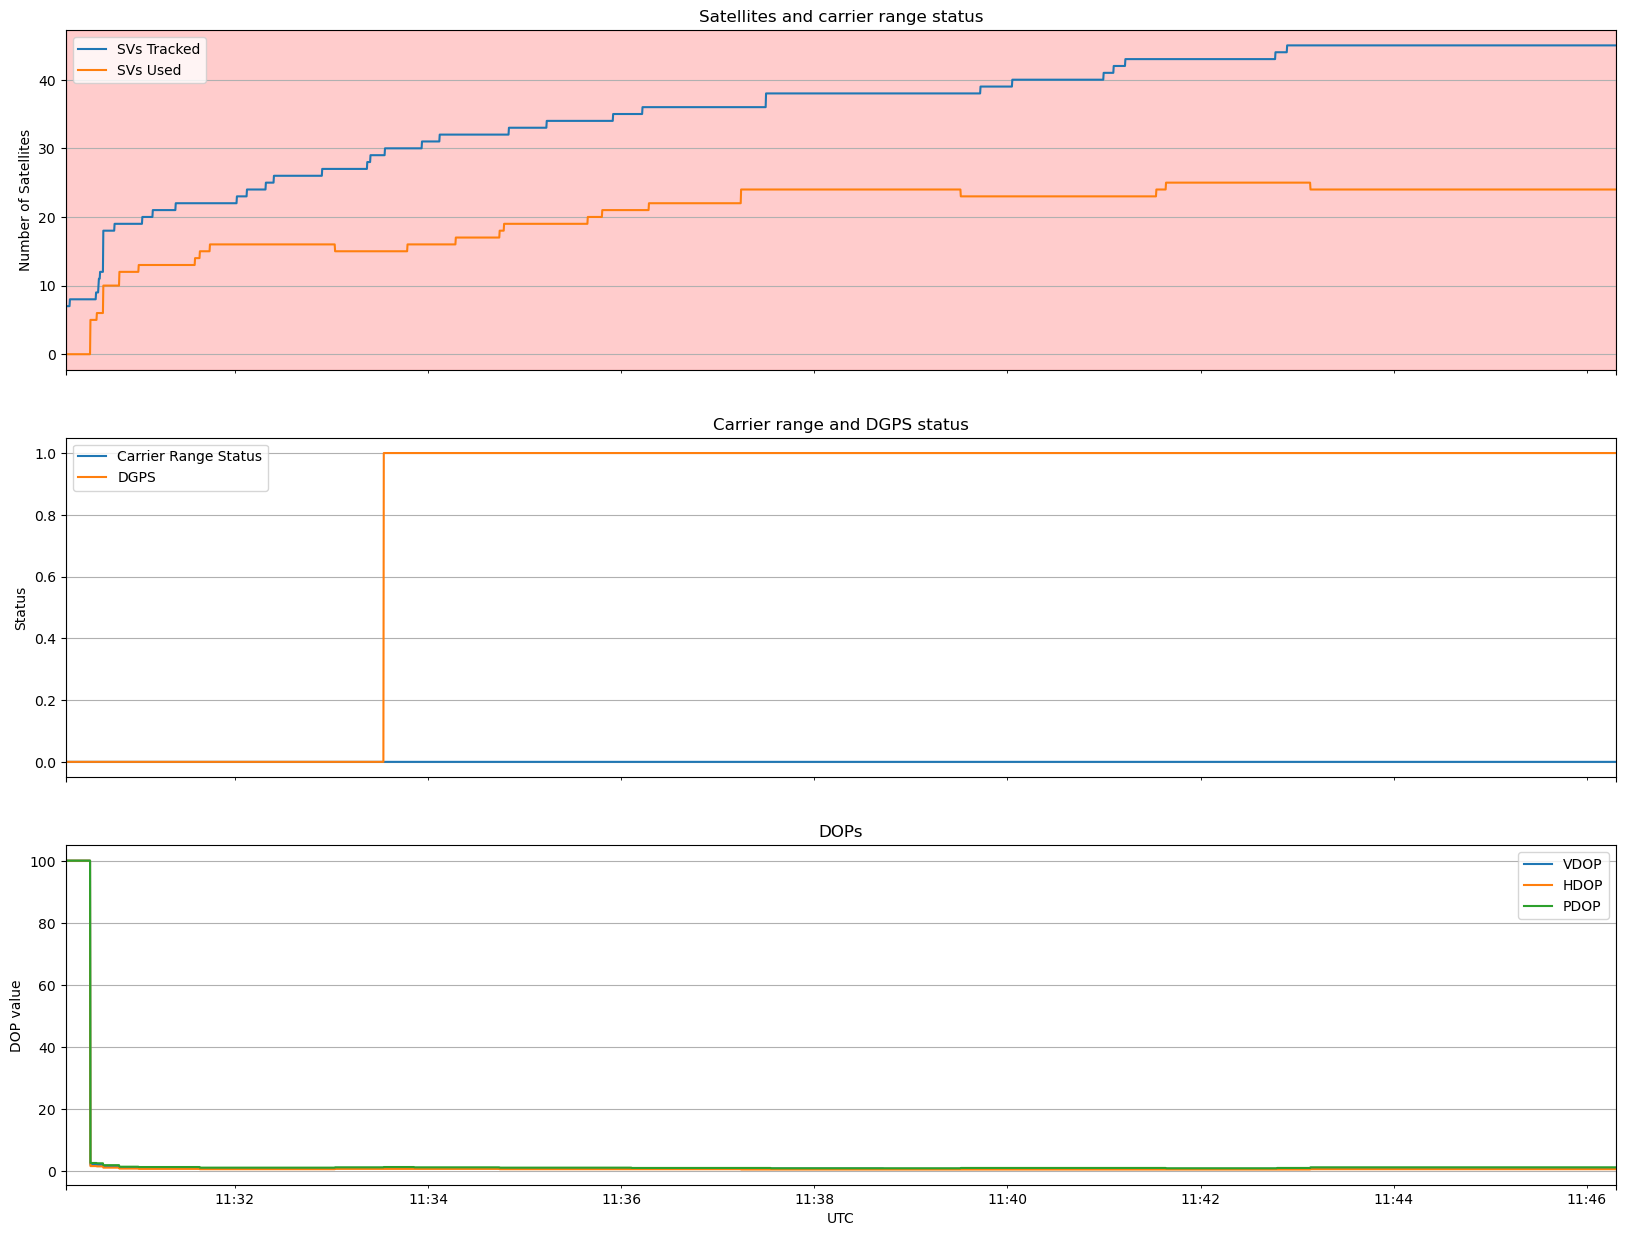

In [5]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15), sharex=True)

df.plot(ax=ax[0],
        title="Satellites and carrier range status",
        x="UTC",
        y=["SVs Tracked", "SVs Used"],
        ylabel="Number of Satellites",
        grid=True)
highlight_carrier_status(ax[0], df)

df.plot(ax=ax[1],
        title="Carrier range and DGPS status",
        x="UTC",
        y=["Carrier Range Status", "DGPS"],
        ylabel="Status",
        grid=True)

df.plot(ax=ax[2],
        title="DOPs",
        x="UTC",
        y=["VDOP", "HDOP", "PDOP"],
        ylabel="DOP value",
        grid=True)

plt.show()

## Observations

- High number of satellites in track/ used
- No carrier-phase range solution, which is expected
- DGPS was used after some time. Reason unknown
- DOPs are crazily high at the beginning and then drop. Maybe because the device came from a cold start.

## Altitude (HAE)

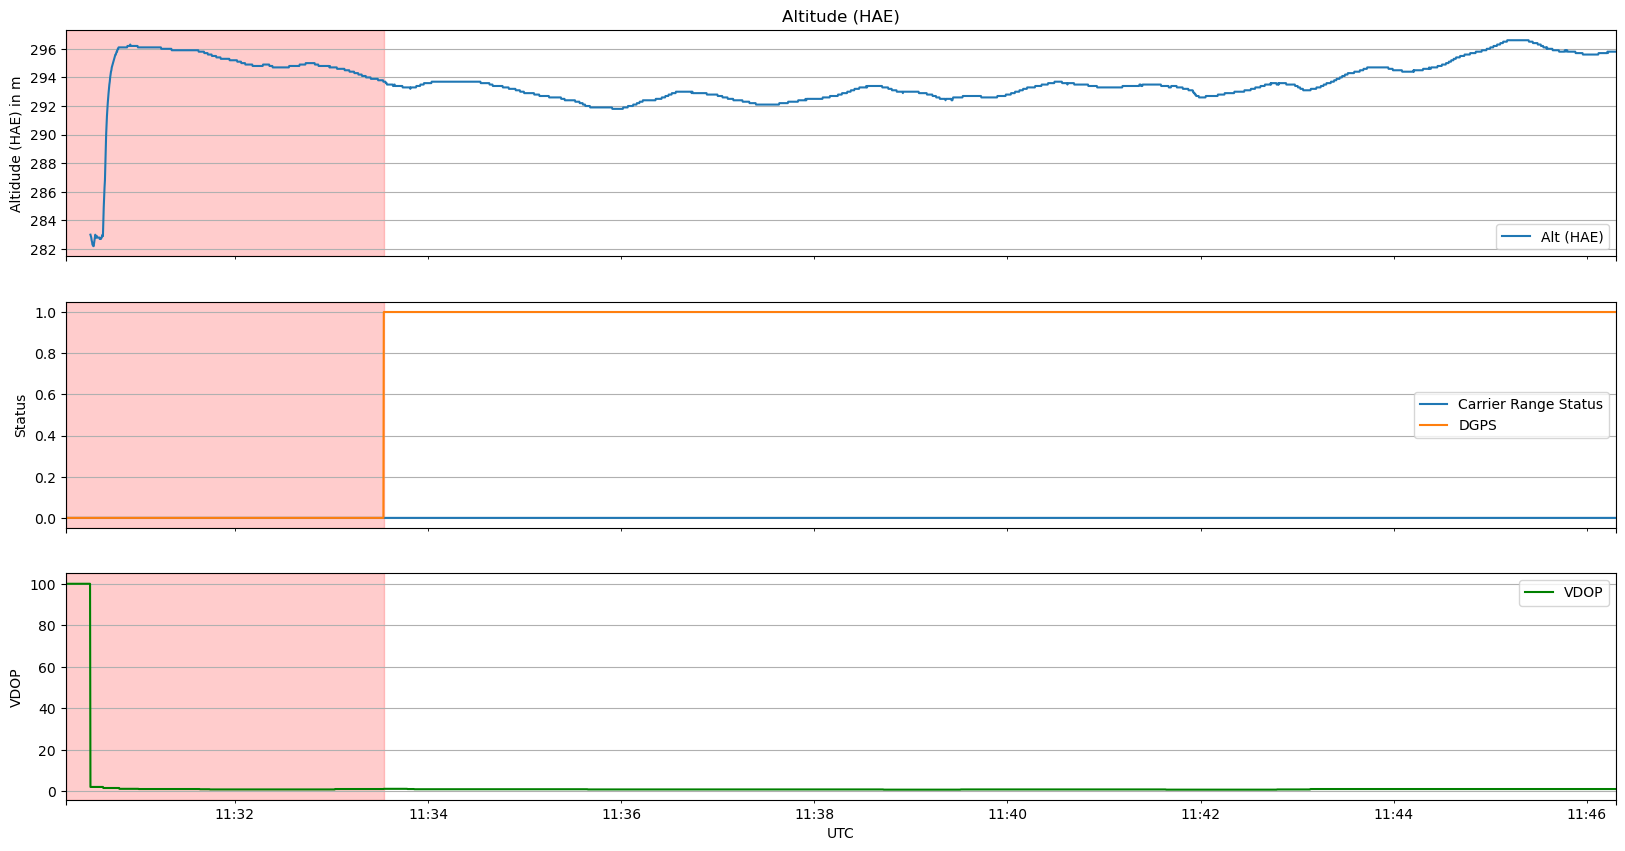

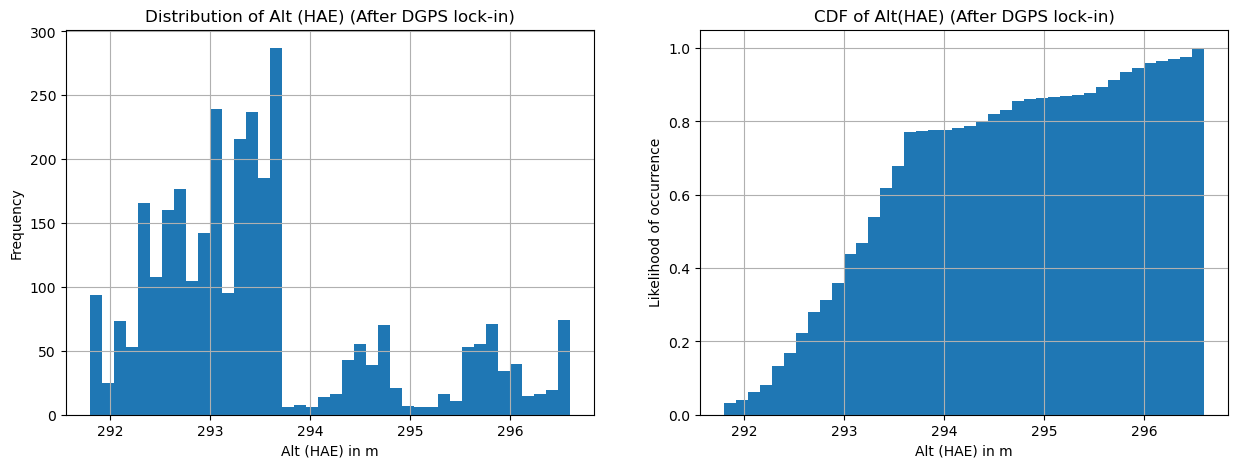

===Statistics (after DGPS lock-in)===
mean: 293.5139732288606 m
median: 293.3 m
95th-percentile: 296.0
max: 296.6 m
min: 291.8 m
std: 1.1644951566625485 m


In [6]:
# Select required data
alt = df["Alt (HAE)"][idx_DGPS_lockin:]  # rows before DGPS lock-in are filtered

# Basic statistics (after DGPS lock-in)
alt_max = alt.max()
alt_max_idx = alt.idxmax()
alt_max_utc = df["UTC"][alt_max_idx]
alt_min = alt.min()
alt_min_idx = alt.idxmin()
alt_mean = alt.mean()
alt_median = alt.median()
alt_std = alt.std()
alt_95til = alt.quantile(q=0.95)

# Plot altitude vs time
fig1, ax = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
ax[0].set_title("Altitude (HAE)")
df.plot(ax=ax[0], x="UTC", y="Alt (HAE)", grid=True)
ax[0].set_ylabel("Altidude (HAE) in m")
#highlight_carrier_status(ax1, df)  # highight region according to carrier-phase status

## Carrier phase status
ax[1].set_ylabel("Status")
df.plot(ax=ax[1], x="UTC", y=["Carrier Range Status", "DGPS"], grid=True)

## VDOP
ax[2].set_ylabel("VDOP")
df.plot(ax=ax[2], x="UTC", y="VDOP", style='g-', grid=True)
ax[0].set_xlabel("Time (UTC)")

for i in range(3):
    ax[i].axvspan(df["UTC"][0], df["UTC"][idx_DGPS_lockin], alpha=0.2, color="red")

plt.show()

# Plot histogram and CDF to check distribution
alt_bins = (int)(alt_max - alt_min)*10

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

alt.hist(ax=ax[0], bins=alt_bins)
ax[0].set_title("Distribution of Alt (HAE) (After DGPS lock-in)")
ax[0].set_ylabel("Frequency")
ax[0].set_xlabel("Alt (HAE) in m")

# Plot CDF
alt.hist(ax=ax[1], cumulative=True, density=True, bins=alt_bins)
ax[1].set_title("CDF of Alt(HAE) (After DGPS lock-in)")
ax[1].set_ylabel("Likelihood of occurrence")
ax[1].set_xlabel("Alt (HAE) in m")
plt.show()

# List out statistics
print("===Statistics (after DGPS lock-in)===")
print("mean:", alt_mean, "m")
print("median:", alt_median, "m")
print("95th-percentile:", alt_95til)
print("max:", alt_max, "m")
print("min:", alt_min, "m")
print("std:", alt_std, "m")

## Observations

- Deviation is higher than RTK solution (2.67 m here vs 0.98 m in RTK 1 Hz test)
- Output is not a normal distribution

# Position

In [7]:
# Helper function
# TODO: move to python module

import math

def dist_lat_lon_to_meter(lat2, lat1, lon2, lon1):
    # Use Haversine formula to find distance (in m) between 2 point in lat/lon coordinate
    r = 6371  # approximate radius of earth
    
    dlat = math.radians(lat2) - math.radians(lat1)
    dlon = math.radians(lon2) - math.radians(lon1)

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    return r * c * 1000

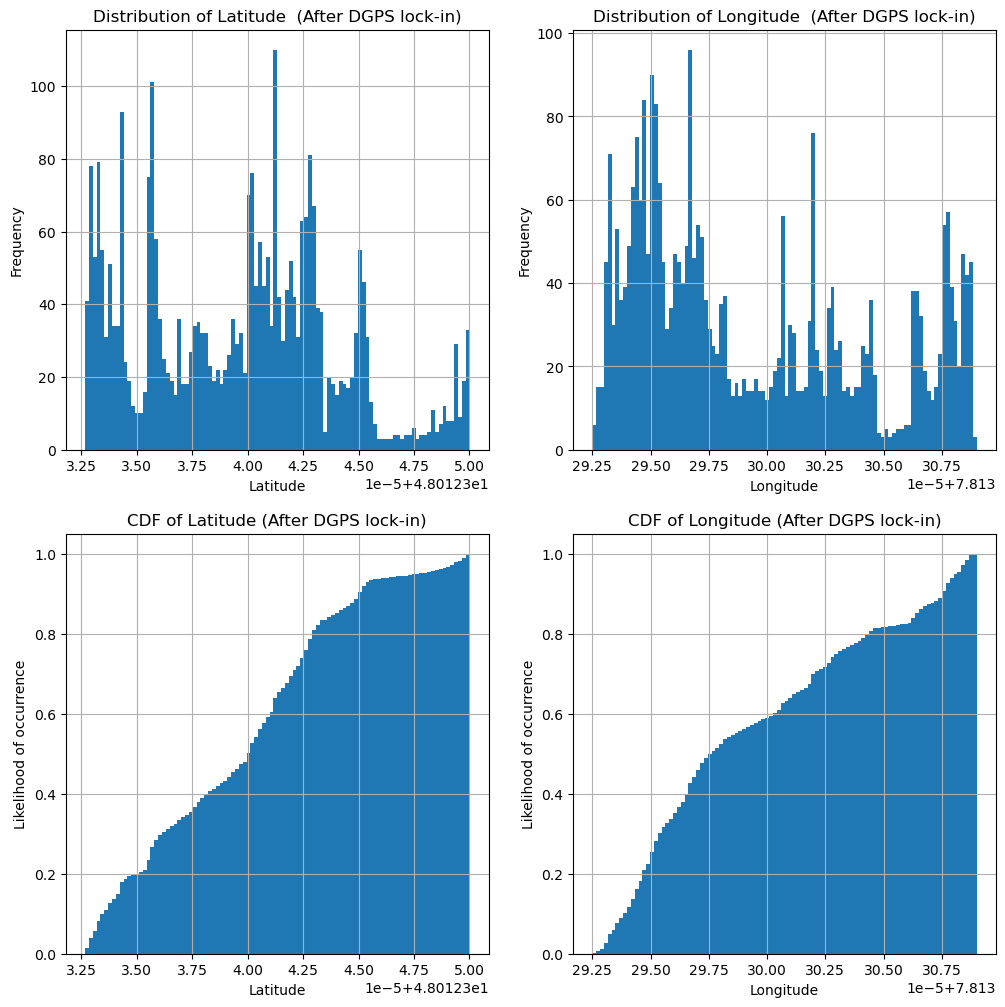

=== Statistics (after DGPS lock-in) - Latitude ===
mean: 48.012339587894225
median: 48.01234
95th-percentile: 48.012347814
max: 48.01235
min: 48.01233267
std: 4.374127302294245e-06
sample variance: 1.913298965667593e-11

=== Statistics (after DGPS lock-in) - Longitude ===
mean: 7.813299380966373
median: 7.81329767
95th-percentile: 7.81330833
max: 7.813309
min: 7.8132925
sample std: 4.988605839670058e-06
sample variance: 2.4886188223590206e-11

=== Precisions ===
east-west: 34.9807 cm
north-south: 48.6381 cm

=== Median to Reference Point Error ===
Error: 256.0163 cm


In [8]:
# Select data
loc = df.loc[:, ["Index", "UTC", "Alt (HAE)", "X", "Y", "Z", "Lat", "Lon", "HDOP"]]
loc_dgps = df.loc[:, ["Index", "UTC", "X", "Y", "Z", "Lat", "Lon"]][idx_DGPS_lockin:]

# Basic statistics

lat = df["Lat"][idx_DGPS_lockin:]
lat_max = lat.max()
lat_max_idx = lat.idxmax()
lat_max_utc = df["UTC"][lat_max_idx]
lat_min = lat.min()
lat_min_idx = lat.idxmin()
lat_mean = lat.mean()
lat_median = lat.median()
lat_std = lat.std()
lat_var = lat.var()
lat_95til = lat.quantile(q=0.95)

long = df["Lon"][idx_DGPS_lockin:]
long_max = long.max()
long_max_idx = long.idxmax()
long_max_utc = df["UTC"][long_max_idx]
long_min = long.min()
long_min_idx = long.idxmin()
long_mean = long.mean()
long_median = long.median()
long_std = long.std()
long_var = long.var()
long_95til = long.quantile(q=0.95)


###
# Check normality of latitude, longitude
###

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
ax[0][0].set_title("Distribution of Latitude  (After DGPS lock-in)")
ax[0][0].set_ylabel("Frequency")
ax[0][0].set_xlabel("Latitude")
loc_dgps["Lat"].hist(ax=ax[0][0], bins=100)
#loc_dgps["Lat"].plot(ax=ax[0][0], kind="hist", x="Latitude", bins=100)

ax[0][1].set_title("Distribution of Longitude  (After DGPS lock-in)")
ax[0][1].set_ylabel("Frequency")
ax[0][1].set_xlabel("Longitude")
loc_dgps["Lon"].hist(ax=ax[0][1], bins=100)

ax[1][0].set_title("CDF of Latitude (After DGPS lock-in)")
ax[1][0].set_ylabel("Likelihood of occurrence")
ax[1][0].set_xlabel("Latitude")
loc_dgps["Lat"].hist(ax=ax[1][0], cumulative=True, density=True, bins=100)

ax[1][1].set_title("CDF of Longitude (After DGPS lock-in)")
ax[1][1].set_ylabel("Likelihood of occurrence")
ax[1][1].set_xlabel("Longitude")
loc_dgps["Lon"].hist(ax=ax[1][1], cumulative=True, density=True, bins=100)

plt.show()


# List out statistics
print("=== Statistics (after DGPS lock-in) - Latitude ===")
print("mean:", lat_mean)
print("median:", lat_median)
print("95th-percentile:", lat_95til)
print("max:", lat_max)
print("min:", lat_min)
print("std:", lat_std)
print("sample variance:", lat_var)

print("\n=== Statistics (after DGPS lock-in) - Longitude ===")
print("mean:", long_mean)
print("median:", long_median)
print("95th-percentile:", long_95til)
print("max:", long_max)
print("min:", long_min)
print("sample std:", long_std)
print("sample variance:", long_var)

print("\n=== Precisions ===")
south_std = dist_lat_lon_to_meter(lat_mean + lat_std, lat_mean, long_mean, long_mean) * 100
north_std = dist_lat_lon_to_meter(lat_mean - lat_std, lat_mean, long_mean, long_mean) * 100
east_west_std = dist_lat_lon_to_meter(lat_mean, lat_mean, long_mean + long_std, long_mean) * 100
print(f"east-west: {east_west_std:0.4f} cm")
print(f"north-south: {north_std:0.4f} cm")

print("\n=== Median to Reference Point Error ===")
med_ref_err = dist_lat_lon_to_meter(lat_median, ref_lat, long_median, ref_lon) * 100
print(f"Error: {med_ref_err:0.4f} cm")
# TODO: consider the accuracy of reference point

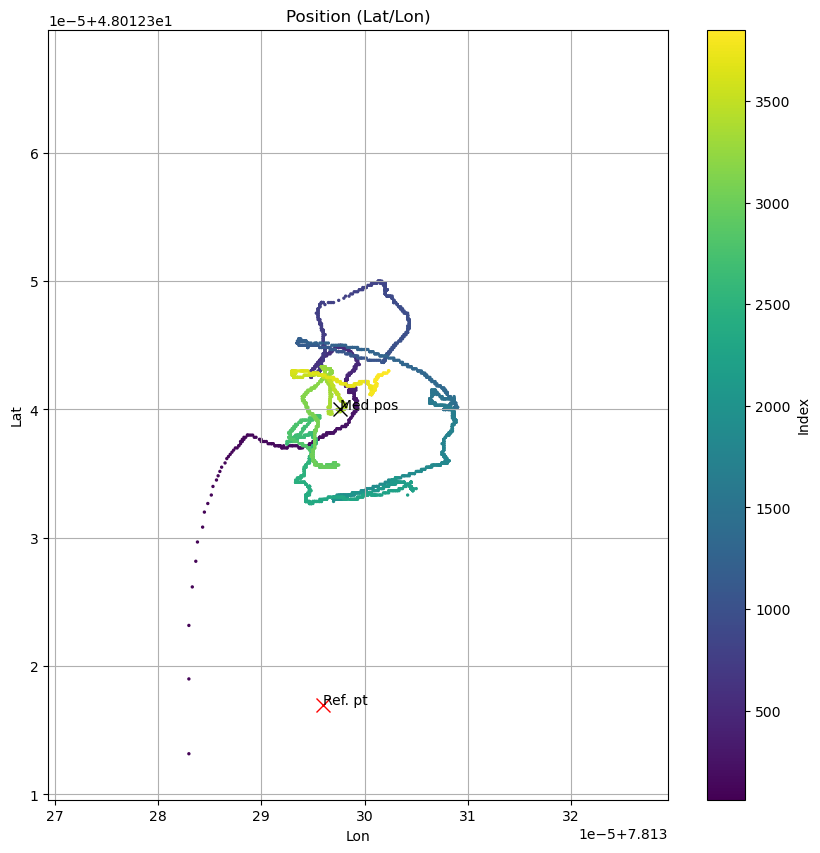

In [12]:
###
# Plot position map
###

div = 0.00003

fig = loc.plot.scatter(title="Position (Lat/Lon)",
                       x="Lon",
                       y="Lat",
                       c="Index",
                       xlim=(long_mean - div, long_mean + div),
                       ylim=(lat_mean - div, lat_mean + div),
                       colormap="viridis",
                       colorbar=True,
                       s=2,
                       grid=True,
                       figsize=(10, 10))
plt.plot(long_median, lat_median, marker="x", markersize=10, markeredgecolor="black")  # mark average position
fig.annotate("Med pos", xy=(long_median, lat_median))  # TODO: add arrow
#plt.plot(long_mean, lat_mean, marker="x", markersize=10, markeredgecolor="blue")  # mark average position
#fig.annotate("Mean pos", xy=(long_median, lat_median))  # TODO: add arrow
plt.plot(ref_lon, ref_lat, marker="x", markersize=10, markeredgecolor="red")  # mark average position
fig.annotate("Ref. pt", xy=(ref_lon, ref_lat))  # TODO: add arrow
plt.show()

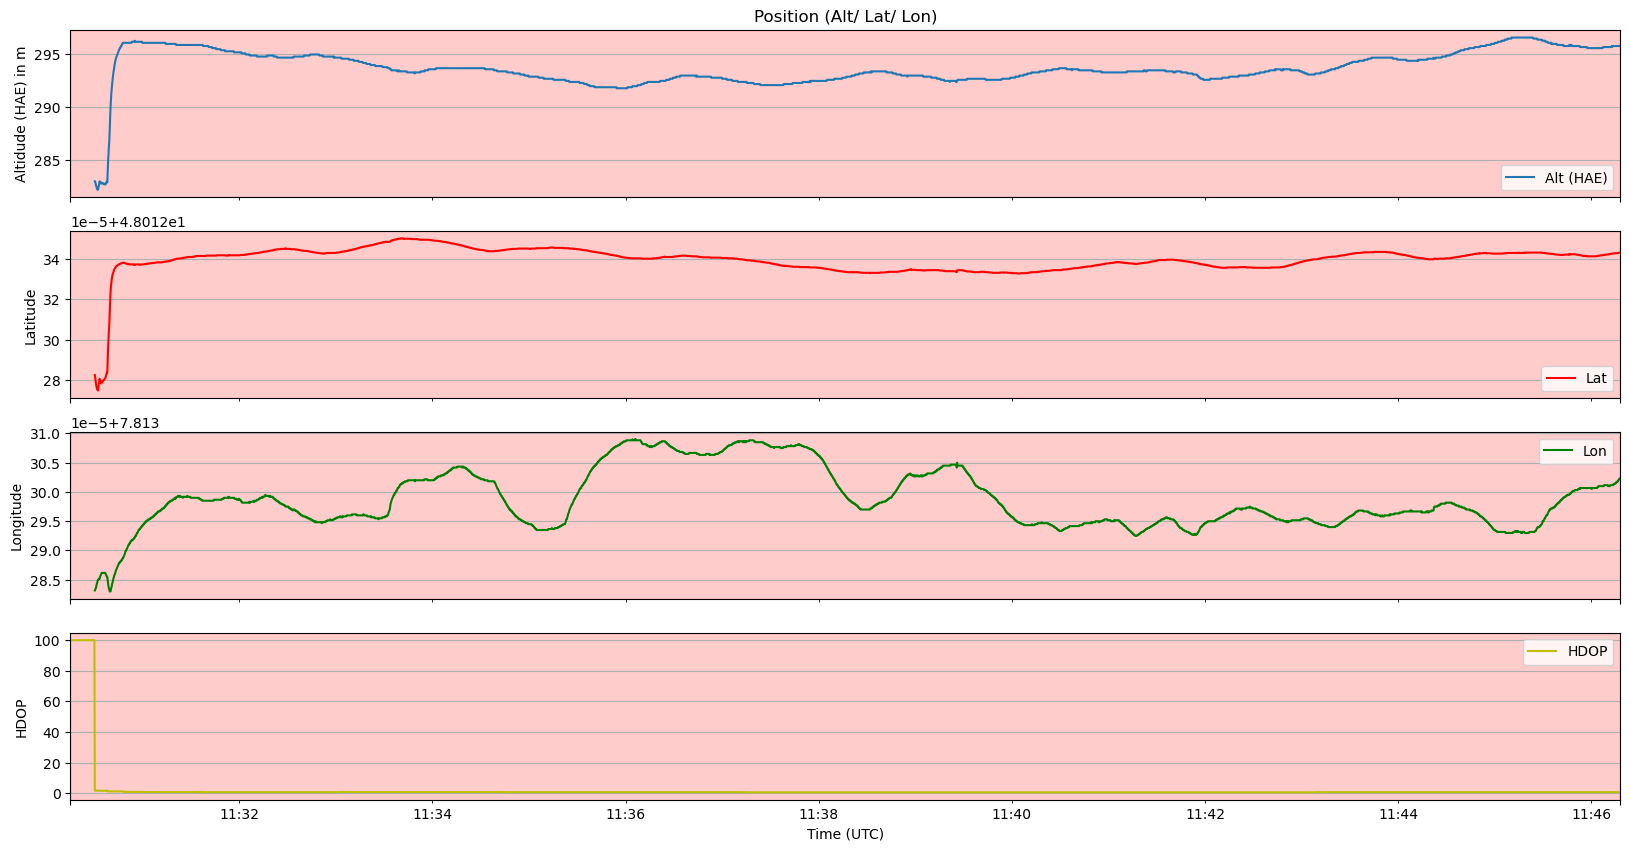

In [10]:
### 
# Plot latitude, longitude, altitude vs time
###

fig, ax = plt.subplots(4, 1, sharex=True, figsize=(20, 10))
ax[0].set_title("Position (Alt/ Lat/ Lon)")
loc.plot(ax=ax[0], x="UTC", y="Alt (HAE)", xlabel="Time (UTC)", ylabel="Altidude (HAE) in m", grid=True)

#ax2 = ax[0].twinx()
#ax2.spines['right'].set_position(('axes', 1.0))
#ax[1].set_ylimit(
loc.plot(ax=ax[1], x="UTC", y="Lat", ylabel="Latitude", style='r-', grid=True)

#ax3 = ax[0].twinx()
#ax3.spines['right'].set_position(('axes', 1.05))
loc.plot(ax=ax[2], x="UTC", y="Lon", ylabel="Longitude", style='g-', grid=True)

## VDOP
df.plot(ax=ax[3], x="UTC", y="HDOP", style='y-', grid=True)
ax[3].set_xlabel("Time (UTC)")
ax[3].set_ylabel("HDOP")

for i in range(4):
    #ax[i].axvspan(df["UTC"][0], df["UTC"][idx_DGPS_lockin], alpha=0.2, color="red")
    highlight_carrier_status(ax[i], df)
plt.show()

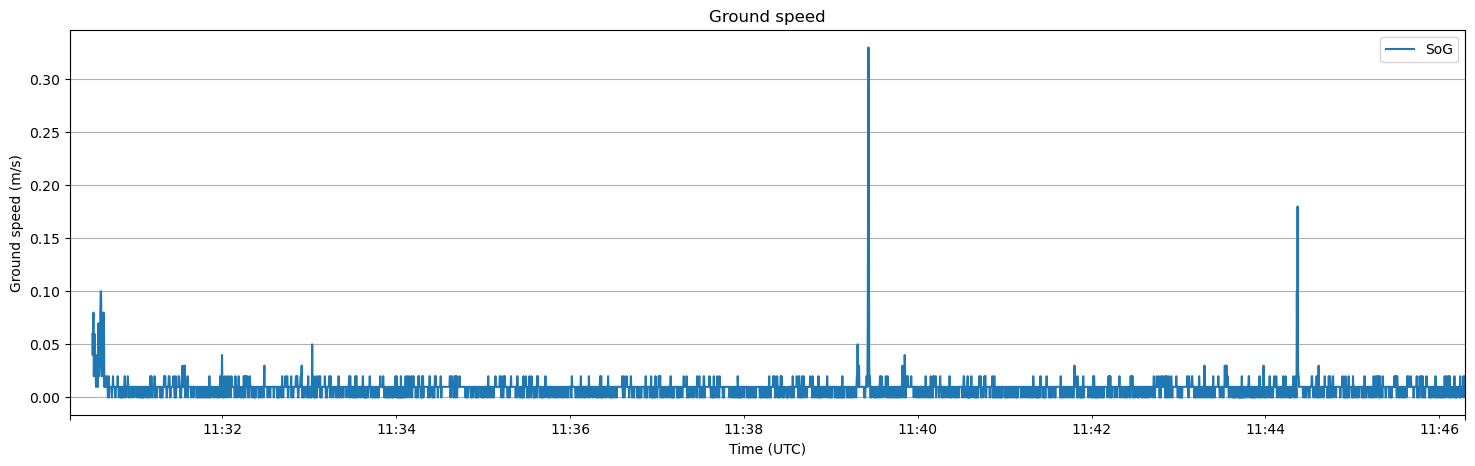

In [11]:
###
# Plot ground speed
###

sog = df.loc[:, ["UTC", "SoG"]]

sog.plot(title="Ground speed", x="UTC", y="SoG", xlabel="Time (UTC)", ylabel="Ground speed (m/s)", figsize=(18, 5), grid=True)
plt.show()

## Further Analysis

TODO:

- Distance deviation plot
  - Finding the variance of position (simply square root the s.d.?)
- convergence rate (How can it be useful?)
- Find a way to determine the precision (and accuracy, if reference position available)
  - Should I use only part of the data?